There are so many notes and lots of dumb code in this notebook. I apologize for my personal notes and unorganzed thoughts. Hopefully you can see some rudimentary analysis that I have done. I am happy to run more of these tests or produce nicer visualiztions, this was just my easy overview of the Maryland data. Depending on what we like and what kinds of questions we want to pursue further, we can refine the data processing in this and the other city data we find moving forward. (additionally, apologies for any typos. I did not proof read any of the non-code)

### Load libraries and other useful things

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import time
import datetime
from scipy import stats

# Vaccination Data

### Load data
Datasets named by variable demographic

In [2]:
# vaccine datasets
v_total_md = pd.read_csv("MD_COVID-19_-_Total_Vaccinations_Statewide.csv")
v_race_dist = pd.read_csv("MD_COVID-19_-_Vaccinations_by_Race_Distribution.csv")
v_gender_dist = pd.read_csv("MD_COVID-19_-_Vaccinations_by_Gender_Distribution.csv")
v_ethnicity_dist = pd.read_csv("MD_COVID-19_-_Vaccinations_by_Ethnicity_Distribution.csv")
v_age_dist = pd.read_csv("MD_COVID-19_-_Vaccinations_by_Age_Distribution.csv")
v_county_dist = pd.read_csv("MD_COVID-19_-_Vaccinations_by_County.csv")

# reported cases datasets
c_total_md = pd.read_csv("MD_COVID-19_-_Total_Cases_Statewide.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'MD_COVID-19_-_Total_Vaccinations_Statewide.csv'

### Clean data pt. 1
Strip unnecessary (daily count) data - keep only cumulative counts (first dose, second dose, and single dose AND/OR at least one dose and fully vaccinated)

In [ ]:
# vaccince datasets
v_total_md = v_total_md.drop(['OBJECTID', 'FirstDailyDose', 'SecondDailyDose', 'SingleDailyDose', 'AtleastOneVaccine', 'CompletedVax', 'FirstSecondSingleVaccinations', 'FirstSecondSingleVaccinationsCumulative'], axis=1)
v_race_dist = v_race_dist.drop(['FirstDoseDaily', 'SecondDoseDaily', 'SingleDoseDaily'], axis=1)
v_gender_dist = v_gender_dist.drop(['FirstDoseDaily', 'SecondDoseDaily', 'SingleDoseDaily'], axis=1)
v_ethnicity_dist = v_ethnicity_dist.drop(['FirstDoseDaily', 'SecondDoseDaily', 'SingleDoseDaily'], axis=1)
v_age_dist = v_age_dist.drop(['FirstDailyDose', 'SecondDailyDose', 'SingleDailyDose', 'CombinedTotalDoses', 'CombinedTotalDosesCumulative', 'FullyVaccinated'], axis=1)
v_county_dist = v_county_dist.drop(['FirstDoseDaily', 'SecondDoseDaily', 'SingleDoseDaily', 'AtLeastOneDose', 'FullyVaccinated'], axis=1)

# do NOT run a second time - will throw errors since these columns do not exist and cannot be dropped again #

### Clean data pt. 2
Remove cells with irrelevant or unhelpful data: dates that don't make sense, Federal Entity data, no demographic listed, etc.

In [ ]:
# convert time and date strings to datetime stamps. Also rename all of those columns to 'Date'

tot_lst = []
for k in v_total_md['Vaccination Date']:
    tot_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
v_total_md['Vaccination Date'] = tot_lst
v_total_md.rename(columns={'Vaccination Date': 'Date'}, inplace=True)
race_lst = []
for k in v_race_dist['VACCINATION_DATE']:
    race_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
v_race_dist['VACCINATION_DATE'] = race_lst
v_race_dist.rename(columns={'VACCINATION_DATE': 'Date'}, inplace=True)
gender_lst = []
for k in v_gender_dist['VACCINATION_DATE']:
    gender_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
v_gender_dist['VACCINATION_DATE'] = gender_lst
v_gender_dist.rename(columns={'VACCINATION_DATE': 'Date'}, inplace=True)
ethnicity_lst = []
for k in v_ethnicity_dist['VACCINATION_DATE']:
    ethnicity_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
v_ethnicity_dist['VACCINATION_DATE'] = ethnicity_lst
v_ethnicity_dist.rename(columns={'VACCINATION_DATE': 'Date'}, inplace=True)
age_lst = []
for k in v_age_dist['VACCINATION_DATE']:
    age_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
v_age_dist['VACCINATION_DATE'] = age_lst
v_age_dist.rename(columns={'VACCINATION_DATE': 'Date'}, inplace=True)
county_lst = []
for k in v_county_dist['VACCINATION_DATE']:
    county_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
v_county_dist['VACCINATION_DATE'] = county_lst
v_county_dist.rename(columns={'VACCINATION_DATE': 'Date'}, inplace=True)

# do NOT run a second time - will throw errors since these conversions cannot happen again #

In [ ]:
# for all data sets, remove vaccination data associated with dates prior to Dec. 11, 2020 (and after Oct. 27 at4:30pm when 
# I first downloaded these data sets) since that was when first approval (of Pfizer, then Moderna 12/18/2020, and finally 
# Janssen 2/27/2021) was given in the United States.

v_total_md = v_total_md[(v_total_md['Date'] > '2020-12-11 00:00:01') & (v_total_md['Date'] < '2021-10-27 16:30:00')]
v_race_dist = v_race_dist[(v_race_dist['Date'] > '2020-12-11 00:00:01') & (v_race_dist['Date'] < '2021-10-27 16:30:00')]
v_gender_dist = v_gender_dist[(v_gender_dist['Date'] > '2020-12-11 00:00:01') & (v_gender_dist['Date'] < '2021-10-27 16:30:00')]
v_ethnicity_dist = v_ethnicity_dist[(v_ethnicity_dist['Date'] > '2020-12-11 00:00:01') & (v_ethnicity_dist['Date'] < '2021-10-27 16:30:00')]
v_age_dist = v_age_dist[(v_age_dist['Date'] > '2020-12-11 00:00:01') & (v_age_dist['Date'] < '2021-10-27 16:30:00')]
v_county_dist = v_county_dist[(v_county_dist['Date'] > '2020-12-11 00:00:01') & (v_county_dist['Date'] < '2021-10-27 16:30:00')]


In [ ]:
# remove federal entities from data sets where those guys are present

v_gender_dist = v_gender_dist[v_gender_dist['Gender'] != 'Federal Entities']
v_ethnicity_dist = v_ethnicity_dist[v_ethnicity_dist['Ethnicity'] != 'Federal Entities']
v_age_dist = v_age_dist[v_age_dist['AgeRange'] != 'Federal Entities']
v_county_dist = v_county_dist[v_county_dist['County'] != 'Federal Entities']

In [ ]:
# in race data, combine 'data not available' and 'unknown'

#v_race_dist.loc['UNKNOWN'] = v_race_dist.loc[['DATA NOT AVAILABLE', 'UNKNOWN']].sum()
#v_race_dist = v_race_dist[v_race_dist['Race'] != 'DATA NOT AVAILABLE']

### Some visualizations to get started

<AxesSubplot:xlabel='Date', ylabel='AtleastOneVaccineCumulative'>

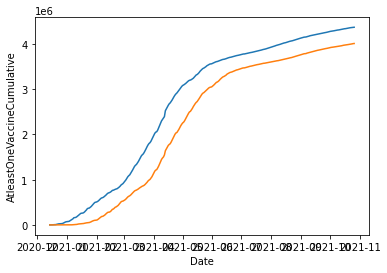

In [ ]:
# Maryland total vaccine count lineplot: time v number of doses administered
sns.lineplot(data=v_total_md, x='Date', y='AtleastOneVaccineCumulative') #blue
sns.lineplot(data=v_total_md, x='Date', y='CompletedVaxCumulative') #orange
#sns.lineplot(data=c_total_md, x='DATE', y='Count')

<AxesSubplot:xlabel='Date', ylabel='SecondDoseCumulative'>

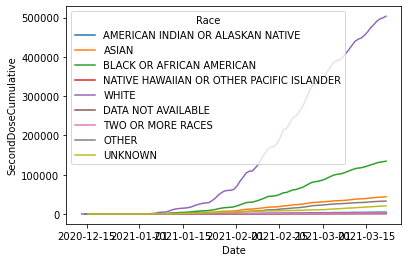

In [ ]:
# Race plot: time v number of second doses administered
sns.lineplot(data=v_race_dist, x='Date', y='SecondDoseCumulative', hue='Race')

<AxesSubplot:xlabel='Date', ylabel='SecondDoseCumulative'>

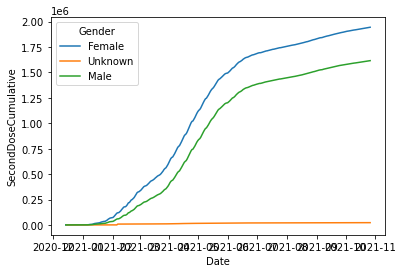

In [ ]:
# Gender plot: time v number of second doses administered
sns.lineplot(data=v_gender_dist, x='Date', y='SecondDoseCumulative', hue='Gender')

<AxesSubplot:xlabel='Date', ylabel='SecondDoseCumulative'>

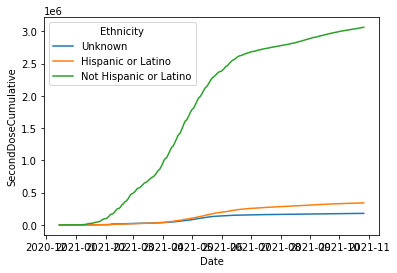

In [ ]:
# Ethnicity plot: time v number of second doses administered
sns.lineplot(data=v_ethnicity_dist, x='Date', y='SecondDoseCumulative', hue='Ethnicity')

<AxesSubplot:xlabel='Date', ylabel='FullyVaccinatedCumulative'>

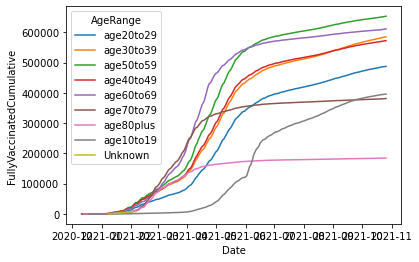

In [ ]:
# Age plot: time v number of fully vaccinated persons in given age group
sns.lineplot(data=v_age_dist, x='Date', y='FullyVaccinatedCumulative', hue='AgeRange')

<AxesSubplot:xlabel='County', ylabel='FullyVaccinatedCumulative'>

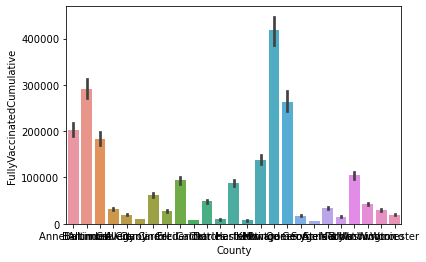

In [ ]:
# County plot: number of fully vaccinated individuals per county
sns.barplot(data=v_county_dist, x='County', y='FullyVaccinatedCumulative')

# Reported Cases Data

### Load data
Datasets named by variable demographic

In [ ]:
# reported cases datasets
c_md = pd.read_csv("MD_COVID-19_-_Total_Cases_Statewide.csv")
c_master_md = pd.read_csv("MD_COVID-19_-_MASTER_Case_Tracker.csv")
c_raceNeth_dist = pd.read_csv("MD_COVID-19_-_Cases_by_Race_and_Ethnicity_Distribution.csv")
c_gender_dist = pd.read_csv("MD_COVID-19_-_Cases_by_Gender_Distribution.csv")
c_age_dist = pd.read_csv("MD_COVID-19_-_Cases_by_Age_Distribution.csv")
c_county_dist = pd.read_csv("MD_COVID-19_-_Cases_by_County.csv")


### Clean data pt. 3
Strip data after Oct. 27 at 4:30pm to be consistent with vaccine data.

In [ ]:
# strip objectid columns first 
c_md = c_md.drop(['OBJECTID'], axis=1)
c_raceNeth_dist = c_raceNeth_dist.drop(['OBJECTID'], axis=1)
c_gender_dist = c_gender_dist.drop(['OBJECTID'], axis=1)
c_age_dist = c_age_dist.drop(['OBJECTID'], axis=1)
c_county_dist = c_county_dist.drop(['OBJECTID'], axis=1)

# do NOT run a second time - will throw errors since these columns do not exist and cannot be dropped again #

In [ ]:
# convert time and date strings to datetime stamps. Also rename all of those columns to 'Date'
c_lst = []
for k in c_md['DATE']:
    c_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
c_md['DATE'] = c_lst
c_md.rename(columns={'DATE': 'Date'}, inplace=True)
master_lst = []
for k in c_master_md['ReportDate']:
    master_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
c_master_md['ReportDate'] = master_lst
c_master_md.rename(columns={'ReportDate': 'Date'}, inplace=True)
race_lst = []
for k in c_raceNeth_dist['DATE']:
    race_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
c_raceNeth_dist['DATE'] = race_lst
c_raceNeth_dist.rename(columns={'DATE': 'Date'}, inplace=True)
gender_lst = []
for k in c_gender_dist['DATE']:
    gender_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
c_gender_dist['DATE'] = gender_lst
c_gender_dist.rename(columns={'DATE': 'Date'}, inplace=True)
age_lst = []
for k in c_age_dist['DATE']:
    age_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
c_age_dist['DATE'] = age_lst
c_age_dist.rename(columns={'DATE': 'Date'}, inplace=True)
county_lst = []
for k in c_county_dist['DATE']:
    county_lst.append(datetime.datetime.strptime(k, '%m/%d/%Y %H:%M:%S %p'))
c_county_dist['DATE'] = county_lst
c_county_dist.rename(columns={'DATE': 'Date'}, inplace=True)


# for all data sets, remove data associated with dates after Oct. 27, 2021 @ 4:30pm when I first downloaded
# these data sets to be consistene with other data
c_md = c_md[c_md['Date'] < '2021-10-27 16:30:00']
c_master_md = c_master_md[c_master_md['Date'] < '2021-10-27 16:30:00']
c_raceNeth_dist = c_raceNeth_dist[c_raceNeth_dist['Date'] < '2021-10-27 16:30:00']
c_gender_dist = c_gender_dist[c_gender_dist['Date'] < '2021-10-27 16:30:00']
c_age_dist = c_age_dist[c_age_dist['Date'] < '2021-10-27 16:30:00']
c_county_dist = c_county_dist[c_county_dist['Date'] < '2021-10-27 16:30:00']

#set date as index for all datasets
c_md.set_index('Date')
c_master_md.set_index('Date')
c_raceNeth_dist = c_raceNeth_dist.set_index('Date')
c_gender_dist = c_gender_dist.set_index('Date')
c_age_dist = c_age_dist.set_index('Date')
c_county_dist.set_index('Date', inplace=True)

### Some more visualizations 

<AxesSubplot:>

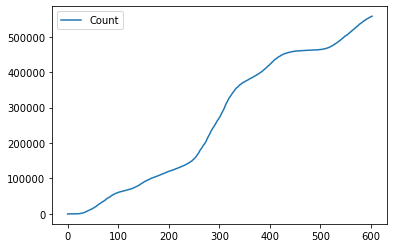

In [ ]:
# Maryland total cumulative count lineplot: time v number reported cases
sns.lineplot(data=c_md)

<AxesSubplot:xlabel='Date'>

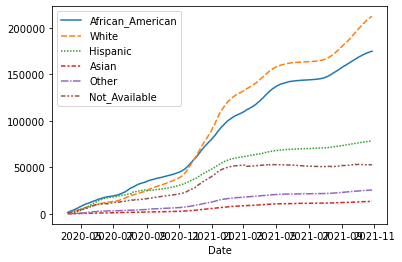

In [ ]:
# Race & ethnicity plot: time v number of cases reported
sns.lineplot(data=c_raceNeth_dist)

<AxesSubplot:xlabel='Date'>

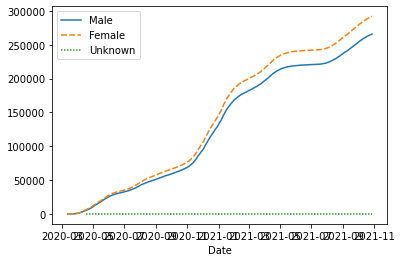

In [ ]:
# Gender plot: time v number of second doses administered
sns.lineplot(data=c_gender_dist)

<AxesSubplot:xlabel='Date'>

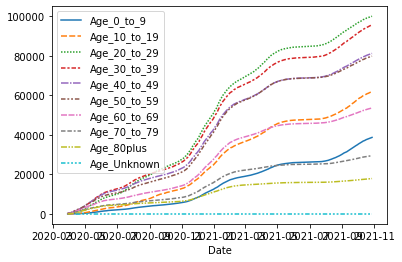

In [ ]:
# Age plot: time v number of fully vaccinated persons in given age group
sns.lineplot(data=c_age_dist)

<AxesSubplot:>

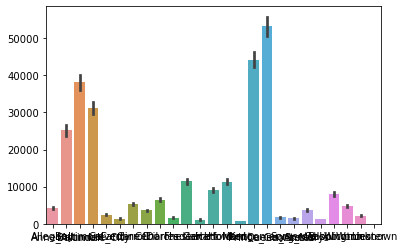

In [ ]:
# County plot: number of fully vaccinated individuals per county
sns.barplot(data=c_county_dist)

# Analysis

## More visualizations
After further thought, I am not sure that we can really claim that we are seeing correlations between cases and vaccines and/or make any claims about disease efficacy because that would insinuate that our sample was the entire state of Maryland, which it was not - it was everyone who had access to and awareness of testing and vaccinations (AND this is assuming that these data sets really do get all the counts and demographic data correctly for all the various sites that provide these resources throughout the state). The following are visualizations that might give someone some idea about the impact the vaccine had in the state, but I'm not sure it's sound data analysis to claim correlations.

### Total cases/vaccinations

In [ ]:
#daily rate of change in reported covid cases (not just cumulative count)
slopes = [0]
for k in range(1,len(c_md['Count'])):
    x = c_md.iloc[k, 1] - c_md.iloc[k-1, 1] 
    slopes.append(x)
c_md['Daily Slope'] = slopes

<AxesSubplot:xlabel='Date', ylabel='AtleastOneVaccineCumulative'>

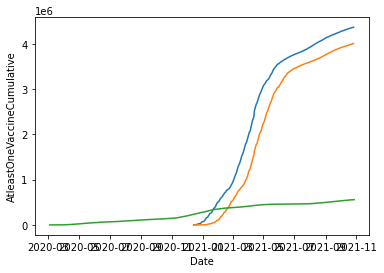

In [ ]:
## Total cumulative count cases vs 1 and 2 dose vaccines
sns.lineplot(data=v_total_md, x='Date', y='AtleastOneVaccineCumulative') #blue
sns.lineplot(data=v_total_md, x='Date', y='CompletedVaxCumulative') #orange
sns.lineplot(data=c_md, x='Date', y='Count')

<AxesSubplot:xlabel='Date', ylabel='Daily Slope'>

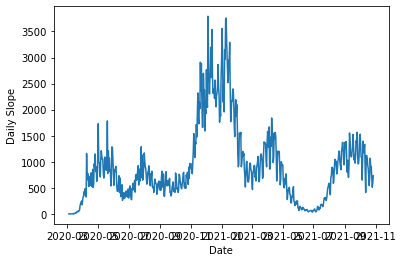

In [ ]:
#shows the daily rate of change in reported covid cases and can be compared with plot above of cumulative cases
sns.lineplot(data=c_md, x='Date', y='Daily Slope')

### Race and Ethnicity
Because the demographics recorded for vaccines and reported cases were different, I didn't invest too much time in meshing the two. Below are just plot for African American data. I can do other groups later, I just chose the first group I saw that existed on both lists for this. I'm also not really sure why there is no vaccination data beyond early summer of this year...

In [ ]:
v_black = v_race_dist[v_race_dist['Race'] == 'BLACK OR AFRICAN AMERICAN']
c_black = c_raceNeth_dist.drop(['White', 'Hispanic', 'Asian', 'Other', 'Not_Available'], axis=1)

c_black.head(3)

,African_American
Date,
2020-04-06 10:00:00,1521.0
2020-04-07 10:00:00,NaN
2020-04-08 10:00:00,2064.0


<AxesSubplot:xlabel='Date', ylabel='FirstDoseCumulative'>

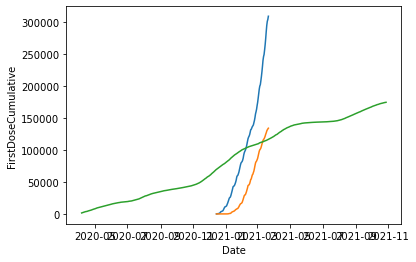

In [ ]:
sns.lineplot(data=v_black, x='Date', y='FirstDoseCumulative') #blue: first dose cumulative
sns.lineplot(data=v_black, x='Date', y='SecondDoseCumulative') #orange: second dose cumulative
sns.lineplot(data=c_black, x='Date', y='African_American') #green: african american cases cumulative

### Gender

In [ ]:
#nope
#sns.lineplot(data=v_gender_dist, x='Date', y='SecondDoseCumulative', hue='Gender')
#sns.lineplot(data=c_gender_dist)
c_raceNeth_dist.head(3)

,African_American,White,Hispanic,Asian,Other,Not_Available
Date,,,,,,
2020-04-06 10:00:00,1521.0,1207.0,NaN,74.0,321.0,922.0
2020-04-07 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-08 10:00:00,2064.0,1540.0,NaN,122.0,449.0,1354.0


## Some correlations
Because we do have samples of people who tested positive and people who got vaccines, we can find correlations there. Here are a couple random questions I chose to parse out.

### African American/Black populations

In [ ]:
#what percetnage of positive cases on Dec. 11, 2020 were Blacks in Maryland?
tot1211 = c_raceNeth_dist.loc['2020-12-11 10:00:00'].sum(skipna=True)
pb1211 = c_raceNeth_dist.loc['2020-12-11 10:00:00', 'African_American'] / tot1211
print(pb1211)

#what percentage of positive cases on Feb. 11, 2021 were Blacks in Maryland?
tot0211 = c_raceNeth_dist.loc['2021-02-11 10:00:00'].sum(skipna=True)
pb0211 = c_raceNeth_dist.loc['2021-02-11 10:00:00', 'African_American'] / tot0211
print(pb0211)

#what percentage of positive cases on Apr. 11, 2021 were Blacks in Maryland?
tot0411 = c_raceNeth_dist.loc['2021-04-11 10:00:00'].sum(skipna=True)
pb0411 = c_raceNeth_dist.loc['2021-04-11 10:00:00', 'African_American'] / tot0211
print(pb0411)

#what percentage of the Maryland population is African American?
#data from https://www.census.gov/quickfacts/fact/table/MD/BZA115219 (as of 2020 census)
totpb = 0.311
#total population
totpop = 6177224

0.2955298484271527
0.28469955010669673
0.34742092887336384


In [ ]:
st1211 = np.sqrt(pb1211*(1-pb1211))
st0211 = np.sqrt(pb0211*(1-pb0211))
st0411 = np.sqrt(pb0411*(1-pb0411))
stpop = np.sqrt(totpb*(1-totpb))

decttest = stats.ttest_ind_from_stats(mean1=pb1211, std1=st1211, nobs1=tot1211,
                           mean2=totpb, std2=stpop, nobs2=totpop)
febttest = stats.ttest_ind_from_stats(mean1=pb0211, std1=st0211, nobs1=tot0211,
                           mean2=totpb, std2=stpop, nobs2=totpop)
aprttest = stats.ttest_ind_from_stats(mean1=pb0411, std1=st0411, nobs1=tot0411,
                           mean2=totpb, std2=stpop, nobs2=totpop)

print(decttest)
print(febttest)
print(aprttest)

Ttest_indResult(statistic=-15.694734520360436, pvalue=1.6472142781914242e-55)
Ttest_indResult(statistic=-33.524552468125215, pvalue=2.219971904243071e-246)
Ttest_indResult(statistic=49.61572487558107, pvalue=0.0)


All of these p values were essentially zero meaning that we can reject the null hypothesis (which I failed to state earlier, but will soon state/interpret) at 95 and 99% confidence. If the null is that the same proportion of African American or Black individuals had covid cases at these three dates as the population porportion of African American/Black individuals in the whole state, they we can conclude from these tests that COVID-19 disproportionately affected the AfricanAmerican/Black community in Maryland during this five month span. I chose these five months because we can look at vaccine accessibility as well:

In [ ]:
v_0211 = v_race_dist[v_race_dist['Date'] == '2021-02-11 10:00:00']

v_aa = v_race_dist
v_aa = v_aa[v_aa['Race'] == 'BLACK OR AFRICAN AMERICAN']
v_aa.set_index('Date', inplace=True)


In [ ]:
#what percentage of vaccines (at least one dose) had been administered to Black individuals as of on Feb. 11, 2021 in Maryland?
tot0211 = v_0211['FirstDoseCumulative'].sum(skipna=True)
pb0211 = v_0211.iloc[2, 2] / tot0211
print(pb0211)

st0211 = np.sqrt(pb0211*(1-pb0211))

febttest = stats.ttest_ind_from_stats(mean1=pb0211, std1=st0211, nobs1=tot0211,
                           mean2=totpb, std2=stpop, nobs2=totpop)
print(febttest)

0.1778552522508784
Ttest_indResult(statistic=-225.9579683578297, pvalue=0.0)


Again, the pvalue is so essentially zero meaning that we can reject the null hypothesis (which I failed to state earlier, but will soon state/interpret) at 95 and 99% confidence. If the null is that the same proportion of African American or Black individuals had covid vaccines (at least one dose) by Feb 11, 2011 as the population porportion of African American/Black individuals in the whole state, then we can conclude from this test that the COVID-19 relief resources were not as widely available or used by the AfricanAmerican/Black community in Maryland ath this time. This could be due to a variety of socioeconomic factors, a lack of awareness of or education about the vaccine, or many others.

### Gender differences

In [ ]:
#what percetnage of positive cases on Jan. 01, 2020 were females in Maryland?
F0101 = c_gender_dist.loc['2021-01-01 10:00:00'].sum(skipna=True)
pF0101 = c_gender_dist.loc['2021-01-01 10:00:00', 'Female'] / F0101
print(pF0101)

#what percetnage of positive cases on Mar. 01, 2020 were females in Maryland?
F0301 = c_gender_dist.loc['2021-03-01 10:00:00'].sum(skipna=True)
pF0301 = c_gender_dist.loc['2021-03-01 10:00:00', 'Female'] / F0301
print(pF0301)

#what percetnage of positive cases on May 01, 2020 were females in Maryland?
F0501 = c_gender_dist.loc['2021-05-01 10:00:00'].sum(skipna=True)
pF0501 = c_gender_dist.loc['2021-05-01 10:00:00', 'Female'] / F0501
print(pF0501)

#what percetnage of positive cases on Jul. 01, 2020 were females in Maryland?
F0701 = c_gender_dist.loc['2021-07-01 10:00:00'].sum(skipna=True)
pF0701 = c_gender_dist.loc['2021-07-01 10:00:00', 'Female'] / F0701
print(pF0701)

#what percentage of the Maryland population is African American?
#data from https://www.census.gov/quickfacts/fact/table/MD/BZA115219 (as of 2020 census)
totpF = 0.516
#total population
totpop = 6177224

0.5248359318961241
0.5231903674399402
0.5227282865682294
0.5231099979669258


In [ ]:
st0101 = np.sqrt(pF0101*(1-pF0101))
st0301 = np.sqrt(pF0301*(1-pF0301))
st0501 = np.sqrt(pF0501*(1-pF0501))
st0701 = np.sqrt(pF0701*(1-pF0701))
stpop = np.sqrt(totpF*(1-totpF))

janttest = stats.ttest_ind_from_stats(mean1=pF0101, std1=st0101, nobs1=F0101,
                           mean2=totpF, std2=stpop, nobs2=totpop)
marttest = stats.ttest_ind_from_stats(mean1=pF0301, std1=st0301, nobs1=F0301,
                           mean2=totpF, std2=stpop, nobs2=totpop)
mayttest = stats.ttest_ind_from_stats(mean1=pF0501, std1=st0501, nobs1=F0501,
                           mean2=totpF, std2=stpop, nobs2=totpop)
julttest = stats.ttest_ind_from_stats(mean1=pF0701, std1=st0701, nobs1=F0701,
                           mean2=totpF, std2=stpop, nobs2=totpop)

print(janttest)
print(marttest)
print(mayttest)
print(julttest)

Ttest_indResult(statistic=9.154478659277157, pvalue=5.463611165386334e-20)
Ttest_indResult(statistic=8.637646327733497, pvalue=5.739543511994425e-18)
Ttest_indResult(statistic=8.704849614940164, pvalue=3.180668299057926e-18)
Ttest_indResult(statistic=9.331522939879578, pvalue=1.0439091680638852e-20)


In [ ]:
v_0101 = v_gender_dist[v_gender_dist['Date'] == '2021-01-01 10:00:00']
v_0301 = v_gender_dist[v_gender_dist['Date'] == '2021-03-01 10:00:00']
v_0501 = v_gender_dist[v_gender_dist['Date'] == '2021-05-01 10:00:00']
v_0701 = v_gender_dist[v_gender_dist['Date'] == '2021-07-01 10:00:00']

#what percentage of vaccines (at least one dose) had been administered to females as of Jan. 01, 2021 in Maryland?
tot0101 = v_0101['FirstDoseCumulative'].sum(skipna=True)
pF0101 = v_0101.iloc[0, 2] / tot0101
print(pF0101)
#what percentage of vaccines (at least one dose) had been administered to females as of Mar. 01, 2021 in Maryland?
tot0301 = v_0301['FirstDoseCumulative'].sum(skipna=True)
pF0301 = v_0301.iloc[0, 2] / tot0301
print(pF0301)
#what percentage of vaccines (at least one dose) had been administered to females as of May 01, 2021 in Maryland?
tot0501 = v_0501['FirstDoseCumulative'].sum(skipna=True)
#pF0501 = v_0501.iloc[0, 2] / tot0501
#print(pF0501)
#what percentage of vaccines (at least one dose) had been administered to females as of Jul. 01, 2021 in Maryland?
tot0701 = v_0701['FirstDoseCumulative'].sum(skipna=True)
#pF0701 = v_0701.iloc[0, 2] / tot0701
#print(pF0701)

# turns out there isn't data for may and july.

st0101 = np.sqrt(pF0101*(1-pF0101))
st0301 = np.sqrt(pF0301*(1-pF0301))

janttest = stats.ttest_ind_from_stats(mean1=pF0101, std1=st0101, nobs1=tot0101,
                           mean2=totpF, std2=stpop, nobs2=totpop)
marttest = stats.ttest_ind_from_stats(mean1=pF0301, std1=st0301, nobs1=tot0301,
                           mean2=totpF, std2=stpop, nobs2=totpop)
print(janttest)
print(marttest)



0.6720113772622068
0.6076316271462221
Ttest_indResult(statistic=83.18042457779458, pvalue=0.0)
Ttest_indResult(statistic=166.04459255492196, pvalue=0.0)


None of the p values for these tests were significant either.  Oddly enough, the proportions of reported cases (Jan through July of 2021) that were female  individuals was higher (barely) than the state-wide proportion of females. Additionally, the proportion of individuals that had received at least one dose of teh vaccine was significantly greater for females than any other reported gender category.